## Baseline checks

Just checking everything works as it should

In [8]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import json
import os
# set cwd
os.chdir("/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/analysis")



## Use the produced model to plot the output

In [ ]:


# Now load the federated learning loss
fedode = f"../results_luisa/periodic/federated_training/FedODE/50_rounds/rep_1-alpha_0.5-lr_0.05-batchsize_32_clipping_False/federated_outputs/results.json"
fedavg = f"../results_luisa/periodic/federated_training/FedAvg/50_rounds/rep_1-alpha_0.5-lr_0.05-batchsize_32_clipping_False/federated_outputs/results.json"

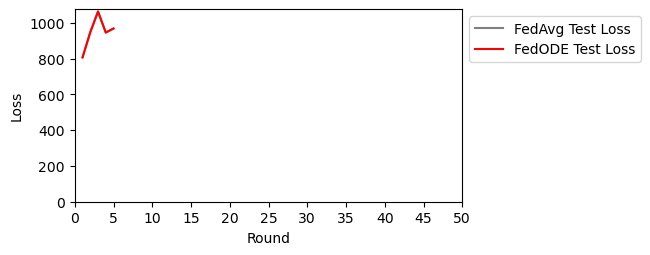

In [43]:
# plot loss of both fedode and fedavg
with open(fedavg, 'r') as f:
    data_fedavg = json.load(f)
with open(fedode, 'r') as f:
    data_fedode = json.load(f)

data_fedavg_df = pd.DataFrame(data_fedavg['federated_evaluate'])
data_fedode_df = pd.DataFrame(data_fedode['federated_evaluate'])
# join the two dataframes on the round
data_fedavg_df['round'] = data_fedavg_df['round'].astype(int)
data_fedode_df['round'] = data_fedode_df['round'].astype(int)
df_fedavg_fedode = pd.merge(data_fedavg_df, data_fedode_df, on='round')
# now plot the data
plt.figure(figsize=(5, 2.5))
plt.plot(df_fedavg_fedode['round'], df_fedavg_fedode['federated_evaluate_loss_x'], label='FedAvg Test Loss', color='grey')  
plt.plot(df_fedavg_fedode['round'], df_fedavg_fedode['federated_evaluate_loss_y'], label='FedODE Test Loss', color='red')
# add legend on the outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df_fedavg_fedode['round'])
# make the x ticks every 5 rounds
plt.xticks(np.arange(0, 51, 5))
# add x and y labels
plt.xlabel('Round')
plt.ylabel('Loss')
plt.show()


In [ ]:
def get_df(field = "nodesolve"):
    cns = [0, 1]
    df = pd.DataFrame()
    for cn in cns:
        results_path = f"../results_luisa/periodic/federated_training/FedODE/50_rounds/rep_1-alpha_0.5-lr_0.05-batchsize_32_clipping_False/federated_outputs/results_{cn}.json"
        # path to the results file
        with open(results_path, "r") as f:
            data = json.load(f)
        for entry in data["client_train"]:
                round_num = entry["round"]
                for itr, loss_val in enumerate(entry[field]):
                    df = pd.concat([df, pd.DataFrame([{
                        "client": cn,
                        "round": round_num,
                        "itr": itr,
                        field: loss_val
                    }])], ignore_index=True)
    
    df["itr"] = df["itr"] + 1
    max_itr = df["itr"].max()
    df["itr"] = df["itr"] + (max_itr* df["round"])
    # keep only itr 1:3
    return df

    

# keep only itr 1:3
df = get_df("nodesolve")

In [41]:
df

,client,round,itr,nodesolve
0,0,0,1,20
1,0,0,2,26
2,0,0,3,32
3,0,0,4,38
4,0,0,5,44
...,...,...,...,...
2995,1,49,1496,170
2996,1,49,1497,182
2997,1,49,1498,170
2998,1,49,1499,164


/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_17512/381112687.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="itr", y="nodesolve", palette="Set1")
/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_17512/381112687.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Client")
/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_17512/381112687.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Client", bbox_to_anchor=(1.05, 1), loc='upper left')


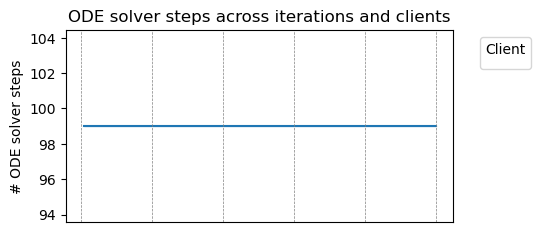

In [51]:
# Plot Loss for making sure, y loss, x round, color client
plt.figure(figsize=(5, 2.5))
sns.lineplot(data=df, x="itr", y="nodesolve", palette="Set1")

plt.legend(title="Client")
plt.legend(title="Client", bbox_to_anchor=(1.05, 1), loc='upper left')
# x integer not float ticks
plt.title("ODE solver steps across iterations and clients")
max_itr = df["itr"].max() // (df["round"].max()+1)
# plot rounds as vertical lines
for i in range(0, df["round"].max()+2):
    plt.axvline(x=(i*max_itr), color='gray', linestyle='--', linewidth=0.5)
    # add ticks with the round number
    #plt.text((i*max_itr), 0, str(i), fontsize=8, ha='center', va='bottom')
    # remove the ticks
    plt.xticks()
# remove the ticks
plt.xticks([])

# y label 
plt.ylabel("# ODE solver steps")
plt.xlabel("")
# x label
plt.show()